In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import joblib
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
%cd /content/drive/Shareddrives/Healthcare_Fraud/Unzipped_Files

/content/drive/Shareddrives/Healthcare_Fraud/Unzipped_Files


In [4]:
# Load the train data into dataframe
Provider = pd.read_csv("Train-1542865627584.csv")
Beneficiary = pd.read_csv("Train_Beneficiarydata-1542865627584.csv")
Inpatient = pd.read_csv("Train_Inpatientdata-1542865627584.csv")
Outpatient = pd.read_csv("Train_Outpatientdata-1542865627584.csv")

Split the Raw Data into train and validation

In [5]:
# split the provider data into train and validation
Train_Provider, Validation_Provider = train_test_split(Provider, test_size=0.2, random_state=42, stratify=Provider['PotentialFraud'])
Train_Provider = Train_Provider.sort_index(axis=0)
Validation_Provider = Validation_Provider.sort_index(axis=0)

In [6]:
print(Train_Provider.shape)
Train_Provider.head()

(4328, 2)


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
4,PRV51007,No
8,PRV51013,No


In [7]:
print(Validation_Provider.shape)
Validation_Provider.head()

(1082, 2)


,Provider,PotentialFraud
3,PRV51005,Yes
5,PRV51008,No
6,PRV51011,No
7,PRV51012,No
11,PRV51016,No


In [8]:
# save the train and validation provider into csv file
Train_Provider.to_csv('Train_Provider.csv', index=False)
Validation_Provider.to_csv('Validation_Provider.csv', index=False)

In [9]:
common_rows_tr_ip = Inpatient.Provider.isin(Train_Provider.Provider)
Train_Inpatient = Inpatient[common_rows_tr_ip]
Train_Inpatient = Train_Inpatient.sort_index(axis=0)

common_rows_val_ip = Inpatient.Provider.isin(Validation_Provider.Provider)
Validation_Inpatient = Inpatient[common_rows_val_ip]
Validation_Inpatient = Validation_Inpatient.sort_index(axis=0)

In [10]:
print(Train_Inpatient.shape)
Train_Inpatient.head()

(31496, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
5,BENE11017,CLM70950,2009-10-06,2009-10-12,PRV54986,8000,PHY402711,PHY402711,PHY402711,2009-10-06,...,2948,25000,25002,NaN,863.0,NaN,NaN,NaN,NaN,NaN


In [11]:
print(Validation_Inpatient.shape)
Validation_Inpatient.head()

(8978, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
9,BENE11034,CLM31519,2008-12-29,2009-01-05,PRV55215,29000,PHY355604,PHY415867,NaN,2008-12-29,...,4019,4111,4589,NaN,3612.0,4139.0,NaN,NaN,NaN,NaN
12,BENE11037,CLM65412,2009-08-26,2009-08-29,PRV55846,3000,PHY363584,PHY364336,NaN,2009-08-26,...,42731,43310,NaN,NaN,9904.0,4019.0,NaN,NaN,NaN,NaN
15,BENE11045,CLM57153,2009-06-26,2009-06-30,PRV56588,9000,PHY401860,PHY392348,NaN,2009-06-26,...,27651,NaN,NaN,NaN,7935.0,NaN,NaN,NaN,NaN,NaN
21,BENE11057,CLM38115,2009-02-12,2009-02-18,PRV51342,10000,PHY375861,NaN,NaN,2009-02-12,...,41071,25000,2859,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# save the train and inpatient provider into csv file
Train_Inpatient.to_csv('Train_Inpatient.csv', index=False)
Validation_Inpatient.to_csv('Validation_Inpatient.csv', index=False)

In [15]:
common_rows_tr_op = Outpatient.Provider.isin(Train_Provider.Provider)
Train_Outpatient = Outpatient[common_rows_tr_op]
Train_Outpatient = Train_Outpatient.sort_index(axis=0)

common_rows_val_op = Outpatient.Provider.isin(Validation_Provider.Provider)
Validation_Outpatient = Outpatient[common_rows_val_op]
Validation_Outpatient = Validation_Outpatient.sort_index(axis=0)

In [16]:
print(Train_Outpatient.shape)
Train_Outpatient.head()

(392939, 27)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [17]:
print(Validation_Outpatient.shape)
Validation_Outpatient.head()

(124798, 27)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
21,BENE11005,CLM605760,2009-09-30,2009-10-20,PRV54064,50,PHY419180,NaN,PHY419180,71944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200,NaN
33,BENE11011,CLM347780,2009-05-08,2009-05-08,PRV51012,50,PHY429635,NaN,PHY322331,37500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37611
35,BENE11012,CLM230325,2009-03-06,2009-03-06,PRV52587,10,PHY380963,NaN,NaN,41512,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
36,BENE11012,CLM272791,2009-03-29,2009-03-29,PRV52587,100,PHY417949,NaN,NaN,V5489,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
38,BENE11012,CLM291426,2009-04-08,2009-04-28,PRV52587,100,PHY380963,PHY359916,NaN,71141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [18]:
# save the train and outpatient provider into csv file
Train_Outpatient.to_csv('Train_Outpatient.csv', index=False)
Validation_Outpatient.to_csv('Validation_Outpatient.csv', index=False)

In [19]:
bene_tr_ip = list(Train_Inpatient['BeneID'])
bene_tr_op = list(Train_Outpatient['BeneID'])
bene_tr = set(bene_tr_ip + bene_tr_op)

bene_val_ip = list(Validation_Inpatient['BeneID'])
bene_val_op = list(Validation_Outpatient['BeneID'])
bene_val = set(bene_val_ip + bene_val_op)

In [20]:
# get the BeneID associated with train data
common_rows_tr_bene = Beneficiary.BeneID.isin(bene_tr)
Train_Beneficiary = Beneficiary[common_rows_tr_bene]
Train_Beneficiary = Train_Beneficiary.sort_index(axis=0)

# get the BeneID associated with test data
common_rows_val_op = Beneficiary.BeneID.isin(bene_val)
Validation_Beneficiary = Beneficiary[common_rows_val_op]
Validation_Beneficiary = Validation_Beneficiary.sort_index(axis=0)

In [21]:
print(Train_Beneficiary.shape)
Train_Beneficiary.head()

(124969, 25)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [22]:
print(Validation_Beneficiary.shape)
Validation_Beneficiary.head()

(61836, 25)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200
10,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,...,1,1,2,2,1,1,5000,1068,250,320
11,BENE11012,1934-05-01,NaN,1,1,0,14,982,12,12,...,1,1,1,1,1,2,0,0,2890,1740
12,BENE11013,1927-12-01,NaN,2,1,0,7,10,12,12,...,1,2,2,2,2,2,0,0,440,600
13,BENE11014,1938-04-01,NaN,2,1,Y,45,780,12,12,...,1,2,1,2,2,2,21260,2136,120,100


In [23]:
# save the train and outpatient beneficiary into csv file
Train_Beneficiary.to_csv('Train_Beneficiary.csv', index=False)
Validation_Beneficiary.to_csv('Validation_Beneficiary.csv', index=False)

Train best model and save parameters for final prediction

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc , f1_score
from sklearn.metrics import confusion_matrix
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import random

In [25]:
# Read data from stored csv files
Final_Dataset_Provider_Train = pd.read_csv('Final_Train.csv')
print(Final_Dataset_Provider_Train.shape)
Final_Dataset_Provider_Train.head()

(5410, 238)


,Unnamed: 0,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,RenalDiseaseIndicator,...,PerProviderClmDiagnosisCode_4_count_ClaimID,PerProviderClmDiagnosisCode_5_count_ClaimID,PerProviderClmDiagnosisCode_6_count_ClaimID,PerProviderDiagnosisGroupCode_count_ClaimID,Gender_1,Gender_2,Race_1,Race_2,Race_3,Race_5
0,0,PRV51001,0,104640,5340.0,30.0,61,0.0,5,8,...,297,297,297,405,9,16,21,4,0,0
1,1,PRV51003,1,605670,66286.0,382.0,617,0.0,62,29,...,3046,4452,5556,4972,54,78,107,24,0,1
2,2,PRV51004,0,52170,310.0,0.0,362,0.0,0,23,...,13263,15655,17719,22201,46,103,120,24,5,0
3,3,PRV51005,1,280910,3700.0,0.0,2433,0.0,0,259,...,771875,1002383,1134445,1357225,511,654,893,262,10,0
4,4,PRV51007,0,33710,3264.0,19.0,141,0.0,3,11,...,2622,3378,3612,4764,34,38,58,14,0,0


In [26]:
Final_Dataset_Provider_Train = Final_Dataset_Provider_Train.drop(columns=['Unnamed: 0'], axis=1)
print(Final_Dataset_Provider_Train.shape)
Final_Dataset_Provider_Train.head()

(5410, 237)


,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,RenalDiseaseIndicator,NoOfMonths_PartACov,...,PerProviderClmDiagnosisCode_4_count_ClaimID,PerProviderClmDiagnosisCode_5_count_ClaimID,PerProviderClmDiagnosisCode_6_count_ClaimID,PerProviderDiagnosisGroupCode_count_ClaimID,Gender_1,Gender_2,Race_1,Race_2,Race_3,Race_5
0,PRV51001,0,104640,5340.0,30.0,61,0.0,5,8,300,...,297,297,297,405,9,16,21,4,0,0
1,PRV51003,1,605670,66286.0,382.0,617,0.0,62,29,1560,...,3046,4452,5556,4972,54,78,107,24,0,1
2,PRV51004,0,52170,310.0,0.0,362,0.0,0,23,1768,...,13263,15655,17719,22201,46,103,120,24,5,0
3,PRV51005,1,280910,3700.0,0.0,2433,0.0,0,259,13872,...,771875,1002383,1134445,1357225,511,654,893,262,10,0
4,PRV51007,0,33710,3264.0,19.0,141,0.0,3,11,852,...,2622,3378,3612,4764,34,38,58,14,0,0


In [27]:
# Split your whole data into train and test(80-20)
Final_Dataset_Provider_Tr, Final_Dataset_Provider_val = train_test_split(Final_Dataset_Provider_Train, test_size=0.2,
                               random_state=42,stratify=Final_Dataset_Provider_Train['PotentialFraud'])
Final_Dataset_Provider_Tr.shape, Final_Dataset_Provider_val.shape

((4328, 237), (1082, 237))

In [28]:
# Seperate dependent and independent variables
x_train = Final_Dataset_Provider_Tr.drop(axis=1,columns=['Provider','PotentialFraud'])
y_train = Final_Dataset_Provider_Tr['PotentialFraud']
x_train.shape, y_train.shape

((4328, 235), (4328,))

In [29]:
# Seperate dependent and independent variables
x_validation_provider_labels = Final_Dataset_Provider_val[['Provider','PotentialFraud']]
x_validation = Final_Dataset_Provider_val.drop(columns=['Provider','PotentialFraud'],axis=1)
y_validation = Final_Dataset_Provider_val['PotentialFraud']
x_validation.shape, y_validation.shape

((1082, 235), (1082,))

In [30]:
# Standardize the data (train and test)
standard_scaler = StandardScaler()
standard_scaler.fit(x_train)
x_tr = standard_scaler.transform(x_train)
x_val = standard_scaler.transform(x_validation)

# convert pandas.core.series.Series to numpy.ndarray
y_tr = y_train.to_numpy()
y_val = y_validation.to_numpy()

In [31]:
# Now, in the 80% train set, split the train set into D1 and D2.(50-50)
x_d1, x_d2, y_d1, y_d2 = train_test_split(x_tr, y_tr, test_size=0.5,random_state=42,stratify=y_tr)
x_d1.shape, x_d2.shape, y_d1.shape, y_d2.shape

((2164, 235), (2164, 235), (2164,), (2164,))

In [32]:
def pred_prob(clf, data):
    # predicts the probabability of class label using the model
    y_pred = clf.predict_proba(data)[:,1]
    return y_pred

# def draw_roc(train_fpr, train_tpr, test_fpr, test_tpr):
#     # calculate auc for train and test
#     train_auc = auc(train_fpr, train_tpr)
#     test_auc = auc(test_fpr, test_tpr)
#     plt.plot(train_fpr, train_tpr, label="Train AUC ="+"{:.4f}".format(train_auc))
#     plt.plot(test_fpr, test_tpr, label="Test AUC ="+"{:.4f}".format(test_auc))
#     plt.legend()
#     plt.xlabel("False Positive Rate(FPR)", size = 14)
#     plt.ylabel("True Positive Rate(TPR)", size = 14)
#     plt.title("Area Under Curve", size = 16)
#     plt.grid(b=True, which='major', color='g', linestyle='-')
#     plt.show()

def draw_roc(train_fpr, train_tpr, test_fpr, test_tpr):
    # calculate auc for train and test
    train_auc = auc(train_fpr, train_tpr)
    test_auc = auc(test_fpr, test_tpr)
    plt.plot(train_fpr, train_tpr, label="Train AUC =" + "{:.4f}".format(train_auc))
    plt.plot(test_fpr, test_tpr, label="Test AUC =" + "{:.4f}".format(test_auc))
    plt.legend()
    plt.xlabel("False Positive Rate (FPR)", size=14)
    plt.ylabel("True Positive Rate (TPR)", size=14)
    plt.title("Area Under Curve", size=16)
    plt.grid(True)  # Remove the invalid 'grid_b' parameter
    plt.show()


def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
#     print("max(tpr*(1-fpr)) = ", max(tpr*(1-fpr)), "for threshold = ", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [33]:
def draw_confusion_matrix(best_t, x_train, x_test, y_train, y_test, y_train_pred, y_test_pred):
    # Confusion matrix for train and test dataset
    fig, ax = plt.subplots(1,2, figsize=(20,6))

    train_prediction = predict_with_best_t(y_train_pred, best_t)
    cm = confusion_matrix(y_train, train_prediction)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax[0])
    ax[0].set_title('Train Dataset Confusion Matrix', size = 16)
    ax[0].set_xlabel("Predicted Label", size = 14)
    ax[0].set_ylabel("Actual Label", size = 14)

    test_prediction = predict_with_best_t(y_test_pred, best_t)
    cm = confusion_matrix(y_test, test_prediction)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax[1])
    ax[1].set_title('Test Dataset Confusion Matrix', size = 16)
    ax[1].set_xlabel("Predicted Label", size = 14)
    ax[1].set_ylabel("Actual Label", size = 14)
    # plt.grid()
    plt.show()

    return train_prediction, test_prediction

In [34]:
def validate_model(clf, x_train, x_test, y_train, y_test):
    # predict the probability of train data
    y_train_pred = pred_prob(clf, x_train)
    # predict the probability of test data
    y_test_pred = pred_prob(clf, x_test)
    # calculate tpr, fpr for diffeent thresholds using roc_curve
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

    # calculate auc for train and test
    train_auc = auc(train_fpr, train_tpr)
    print("Train AUC = ", train_auc)
    test_auc = auc(test_fpr, test_tpr)
    print("Test AUC = ", test_auc)

    draw_roc(train_fpr, train_tpr, test_fpr, test_tpr)

    best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

    train_prediction, test_prediction = draw_confusion_matrix(best_t, x_train, x_test, y_train, y_test, y_train_pred, y_test_pred)

    train_f1_score = f1_score(y_train, train_prediction)
    test_f1_score = f1_score(y_test, test_prediction)

    return test_auc, test_f1_score, best_t

In [35]:
# define a function to randomly sample data from dataset
def row_col_sampling(x, y):
    total_row_count = x.shape[0]
    total_col_count = x.shape[1]
    # in sampled data i want to keep minimum 40% to maximum 60% number of rows
    sampled_row_count_min = round(total_row_count * 0.4)
    sampled_row_count_max = round(total_row_count * 0.6)
    # in a single dataset the rows should be unique, so setting "replace=False"
    sampled_row_indices = np.random.choice(total_row_count, np.random.randint(sampled_row_count_min,
                                                                              sampled_row_count_max),replace=False)
    sampled_row_indices = np.sort(sampled_row_indices)

    sampled_col_count_min = round(total_col_count * 0.4)
    sampled_col_count_max = round(total_col_count * 0.6)
    sampled_col_indices = np.random.choice(total_col_count, np.random.randint(sampled_col_count_min,
                                                                              sampled_col_count_max),replace=False)
    sampled_col_indices = np.sort(sampled_col_indices)
    # now select the sampled rows and columns from the input data

    #print(len(sampled_row_indices), len(sampled_col_indices))
    x_sampled = x[sampled_row_indices[:,None], sampled_col_indices]
    y_sampled = y[sampled_row_indices]
    #print(x_sampled.shape)

    return x_sampled, y_sampled, sampled_row_indices, sampled_col_indices

In [36]:
def create_k_dataset(x_tr, x_te, y_tr, y_te, k):
    x_tr_list = []
    y_tr_list = []
    x_te_list = []
    # y_te_list = []
    sampled_col_indices_list = []
    for i in range(k):
        x_sampled, y_sampled, sampled_row_indices, sampled_col_indices = row_col_sampling(x_tr, y_tr)
        x_tr_list.append(x_sampled)
        y_tr_list.append(y_sampled)
        x_te_list.append(x_te[:,sampled_col_indices])
        # y_te_list.append(y_te)
        sampled_col_indices_list.append(sampled_col_indices)
    return x_tr_list, y_tr_list, x_te_list, y_te, sampled_col_indices_list

In [37]:
# define a function to train base models
def train_model(x, y):

    model_count = 9
    # pick a model randomly and train it
    m = random.randint(1, model_count)
    if m == 1:
        model = DecisionTreeClassifier(class_weight = 'balanced', max_depth = 50, min_samples_split = 100)
        model = model.fit(x, y)
    elif m == 2:
        model = LogisticRegression(C=0.001,penalty="l2")
        model = model.fit(x, y)
    elif m == 3:
        model = svm.SVC(kernel='linear')
        model = CalibratedClassifierCV(model)
        model = model.fit(x, y)
    elif m == 4:
        model = svm.SVC(kernel='rbf')
        model = CalibratedClassifierCV(model)
        model = model.fit(x, y)
    elif m == 5:
        model = svm.SVC(kernel='poly')
        model = CalibratedClassifierCV(model)
        model = model.fit(x, y)
    elif m == 6:
        model = svm.SVC(kernel='sigmoid')
        model = CalibratedClassifierCV(model)
        model = model.fit(x, y)
    elif m == 7:
        model = XGBClassifier(learning_rate=0.1, max_delta_step=0, max_depth=10)
        model = model.fit(x, y)
    elif m == 8:
        model = GaussianNB()
        model = model.fit(x, y)
    else:
        model = RandomForestClassifier(n_estimators=400, min_samples_split=10, max_features='auto', max_depth=10, random_state=42)
        model = model.fit(x, y)

    return(model)

In [38]:
def train_k_base_learners(x_tr_list, y_tr_list, x_te_list, k):
    # take a empty list to store k models
    model_list = []
    for i in range(k):
        # train using train_model function and store in a list
        trained_model = train_model(x_tr_list[i], y_tr_list[i])
        model_list.append(trained_model)

    base_model_prediction_list = []
    for j in range(k):
        # predict and store in a list
        y_pred = model_list[j].predict_proba(x_te_list[j])[:,1]
        base_model_prediction_list.append(y_pred)

    x_tr_meta_model = np.vstack(base_model_prediction_list).transpose()

    return x_tr_meta_model, model_list

In [39]:
# create 100 sampled dataset
k = 100
x_tr_list_d1, y_tr_list_d1, x_te_list_d2, y_te_d2, sampled_col_indices_list = create_k_dataset(x_d1, x_d2, y_d1, y_d2, k)

# train base learners with each samples dataset
x_tr_meta_model, base_model_list = train_k_base_learners(x_tr_list_d1, y_tr_list_d1, x_te_list_d2, k)

In [40]:
# pass x_val through base learners to generate validation data for meta model
pred_data_list = []
for i in range(len(base_model_list)):
    x_val_base_learner = x_val[:, sampled_col_indices_list[i]]
    # print(x_val_.shape)
    pred_data = base_model_list[i].predict_proba(x_val_base_learner)[:,1]
    # pred_data = model_list[i].predict(x_val_)
    pred_data_list.append(pred_data)
x_val_meta_model = np.vstack(pred_data_list).transpose()

In [41]:
random_forest = RandomForestClassifier(n_estimators=200, min_samples_split=2, max_features='auto', max_depth=5, random_state=42)
random_forest.fit(x_tr_meta_model, y_te_d2)

RandomForestClassifier(max_depth=5, max_features='auto', n_estimators=200,
                       random_state=42)

Train AUC =  0.9837885164663254
Test AUC =  0.9601235352893087


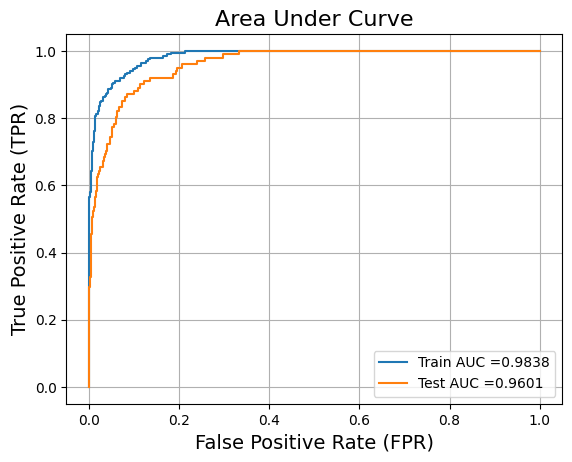

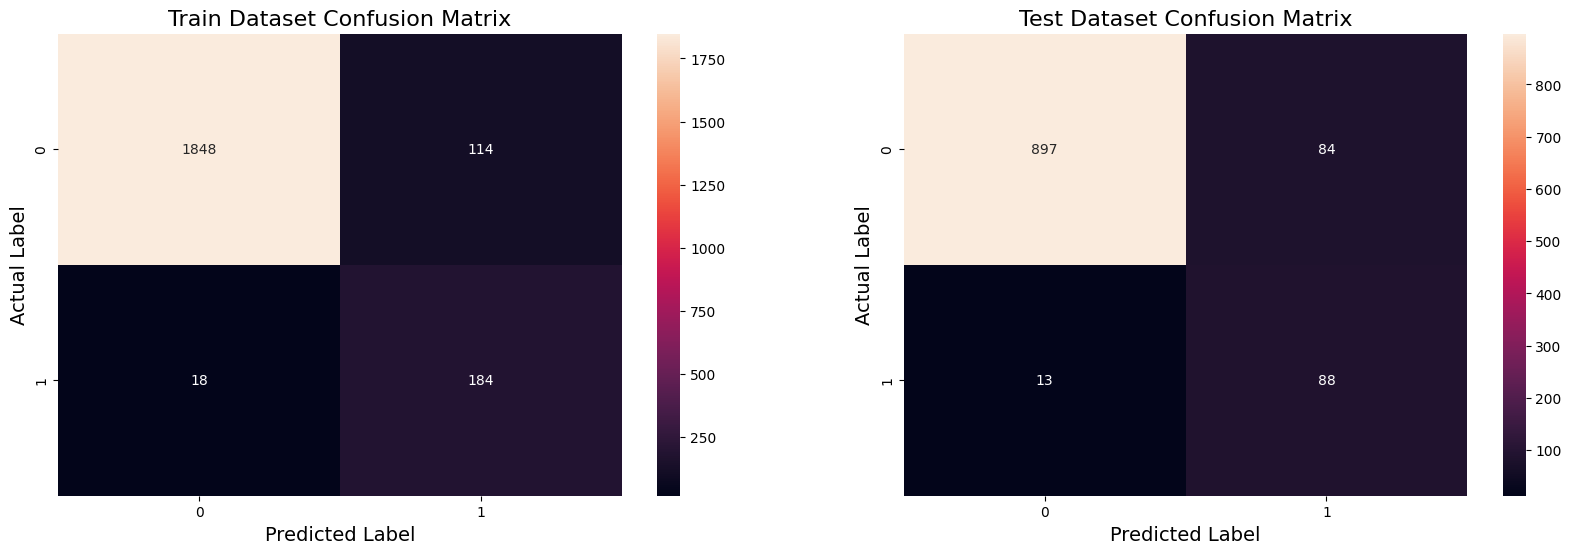

Best Threshold = 0.2092
Model AUC is : 0.9601
Model F1 Score is : 0.6447


In [42]:
# Validate RF model
test_auc, test_f1_score, best_t = validate_model(random_forest, x_tr_meta_model, x_val_meta_model, y_te_d2, y_val)

print("Best Threshold = {:.4f}".format(best_t))
print("Model AUC is : {:.4f}".format(test_auc))
print("Model F1 Score is : {:.4f}".format(test_f1_score))

In [43]:
# save models and required parameters to disk to create the final pipeline
joblib.dump(sampled_col_indices_list, 'sampled_col_indices_list.pkl')
joblib.dump(base_model_list, 'base_model_list.pkl')
joblib.dump(random_forest, 'random_forest.pkl')
joblib.dump(best_t, 'best_t.pkl')

['best_t.pkl']

## Final Pipepline

In [44]:
# Load the raw train data
Test_Provider = pd.read_csv("Validation_Provider.csv")
Test_Beneficiary = pd.read_csv("Validation_Beneficiary.csv")
Test_Inpatient = pd.read_csv("Validation_Inpatient.csv")
Test_Outpatient = pd.read_csv("Validation_Outpatient.csv")

Test_Provider.head()

,Provider,PotentialFraud
0,PRV51005,Yes
1,PRV51008,No
2,PRV51011,No
3,PRV51012,No
4,PRV51016,No


In [45]:
def create_feature_using_groupby(Test_df, gruopby_col, operation_col,operation):
    '''
    This function groupby the 'Train_df' and 'Test_df' dataframe by 'gruopby_col' and performs 'operation' on 'operation_col'
    '''

    for col in operation_col:
        # create new column name for the dataframe
        new_col_name = 'Per'+''.join(gruopby_col)+'_'+operation+'_'+col
        #print(new_col_name)
        Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
    return Test_df

In [46]:
# define a function to preprocess raw test data
def preprocess_test_data(Test_Provider, Test_Beneficiary, Test_Inpatient, Test_Outpatient):

    # Replacing 2 with 0 for chronic conditions, Zero indicates chronic condition is No
    Test_Beneficiary = Test_Beneficiary.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                               'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2,
                               'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2,
                               'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

    # For RenalDiseaseIndicator replacing 'Y' with 1
    Test_Beneficiary = Test_Beneficiary.replace({'RenalDiseaseIndicator': 'Y'}, 1)

    # convert all these columns datatypes to numeric
    Test_Beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]] = Test_Beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]].apply(pd.to_numeric)

    # calculate patient risk score by summing up all risk scores
    Test_Beneficiary['Patient_Risk_Score'] = Test_Beneficiary['ChronicCond_Alzheimer'] + Test_Beneficiary['ChronicCond_Heartfailure'] + \
                                            Test_Beneficiary['ChronicCond_KidneyDisease'] + Test_Beneficiary['ChronicCond_Cancer'] +\
                                            Test_Beneficiary['ChronicCond_ObstrPulmonary'] + Test_Beneficiary['ChronicCond_Depression'] +\
                                        Test_Beneficiary['ChronicCond_Diabetes'] + Test_Beneficiary['ChronicCond_IschemicHeart'] +\
                                        Test_Beneficiary['ChronicCond_Osteoporasis'] + Test_Beneficiary['ChronicCond_rheumatoidarthritis'] +\
                                        Test_Beneficiary['ChronicCond_stroke'] + Test_Beneficiary['RenalDiseaseIndicator']

    # Replacing '2' with '0' for Gender Type
    Test_Beneficiary = Test_Beneficiary.replace({'Gender': 2}, 0)

    # Convert Date of Birth and Date of Death from String to Datetime format
    Test_Beneficiary['DOB'] = pd.to_datetime(Test_Beneficiary['DOB'] , format = '%Y-%m-%d')
    Test_Beneficiary['DOD'] = pd.to_datetime(Test_Beneficiary['DOD'],format = '%Y-%m-%d')

    # Get the birth month and Birth year for DOB and DOD
    Test_Beneficiary['Birth_Year'] = Test_Beneficiary['DOB'].dt.year
    Test_Beneficiary['Birth_Month'] = Test_Beneficiary['DOB'].dt.month

    Test_Beneficiary['Patient_Age'] = round(((Test_Beneficiary['DOD'] - Test_Beneficiary['DOB']).dt.days)/365)
    Test_Beneficiary.Patient_Age.fillna(round(((pd.to_datetime('2009-12-01',format ='%Y-%m-%d')-Test_Beneficiary['DOB']).dt.days)/365),inplace=True)

    # Set value=1 if the patient is dead i.e DOD value is not null
    Test_Beneficiary['isDead'] = 0
    Test_Beneficiary.loc[Test_Beneficiary.DOD.notna(), 'isDead'] = 1

    # convert ClaimStartDt, ClaimEndDt from string to datetime format
    Test_Inpatient['ClaimStartDt'] = pd.to_datetime(Test_Inpatient['ClaimStartDt'] , format = '%Y-%m-%d')
    Test_Inpatient['ClaimEndDt'] = pd.to_datetime(Test_Inpatient['ClaimEndDt'],format = '%Y-%m-%d')

    # convert AdmissionDt, DischargeDt from string to datetime format
    Test_Inpatient['AdmissionDt'] = pd.to_datetime(Test_Inpatient['AdmissionDt'] , format = '%Y-%m-%d')
    Test_Inpatient['DischargeDt'] = pd.to_datetime(Test_Inpatient['DischargeDt'],format = '%Y-%m-%d')

    # Calculate Hospitalization_Duration = DischargeDt - AdmissionDt
    Test_Inpatient['Hospitalization_Duration'] = ((Test_Inpatient['DischargeDt'] - Test_Inpatient['AdmissionDt']).dt.days)+1
    # Calculate Claim_Period = ClaimEndDt - ClaimStartDt
    Test_Inpatient['Claim_Period'] = ((Test_Inpatient['ClaimEndDt'] - Test_Inpatient['ClaimStartDt']).dt.days)+1

    # ExtraClaimDays = Claim_Period - Hospitalization_Duration
    Test_Inpatient['ExtraClaimDays'] = np.where(Test_Inpatient['Claim_Period']>Test_Inpatient['Hospitalization_Duration'], Test_Inpatient['Claim_Period'] - Test_Inpatient['Hospitalization_Duration'], 0)

    # Get the months and year of claim start and claim end
    Test_Inpatient['ClaimStart_Year'] = Test_Inpatient['ClaimStartDt'].dt.year
    Test_Inpatient['ClaimStart_Month'] = Test_Inpatient['ClaimStartDt'].dt.month
    Test_Inpatient['ClaimEnd_Year'] = Test_Inpatient['ClaimEndDt'].dt.year
    Test_Inpatient['ClaimEnd_Month'] = Test_Inpatient['ClaimEndDt'].dt.month

    # Get the month and year of Admission_Year and Admission_Month
    Test_Inpatient['Admission_Year'] = Test_Inpatient['AdmissionDt'].dt.year
    Test_Inpatient['Admission_Month'] = Test_Inpatient['AdmissionDt'].dt.month

    Test_Inpatient['Discharge_Year'] = Test_Inpatient['DischargeDt'].dt.year
    Test_Inpatient['Discharge_Month'] = Test_Inpatient['DischargeDt'].dt.month

    # convert ClaimStartDt, ClaimEndDt from string to datetime format
    Test_Outpatient['ClaimStartDt'] = pd.to_datetime(Test_Outpatient['ClaimStartDt'] , format = '%Y-%m-%d')
    Test_Outpatient['ClaimEndDt'] = pd.to_datetime(Test_Outpatient['ClaimEndDt'],format = '%Y-%m-%d')

    # Get the months and year of claim start and claim end
    Test_Outpatient['ClaimStart_Year'] = Test_Outpatient['ClaimStartDt'].dt.year
    Test_Outpatient['ClaimStart_Month'] = Test_Outpatient['ClaimStartDt'].dt.month
    Test_Outpatient['ClaimEnd_Year'] = Test_Outpatient['ClaimEndDt'].dt.year
    Test_Outpatient['ClaimEnd_Month'] = Test_Outpatient['ClaimEndDt'].dt.month

    # Calculate Claim_Period = ClaimEndDt - ClaimStartDt
    Test_Outpatient['Claim_Period'] = ((Test_Outpatient['ClaimEndDt'] - Test_Outpatient['ClaimStartDt']).dt.days)+1

    # Create a new column Inpatient_or_Outpatient where Inpatient =1 and Outpatient = 0
    Test_Inpatient['Inpatient_or_Outpatient'] = 1
    Test_Outpatient['Inpatient_or_Outpatient'] = 0

    # Merge inpatient and outpatient dataframes based on common columns
    common_columns_test = [ idx for idx in Test_Outpatient.columns if idx in Test_Inpatient.columns]
    Inpatient_Outpatient_Merge_Te = pd.merge(Test_Inpatient, Test_Outpatient, left_on = common_columns_test, right_on = common_columns_test,how = 'outer')

    # Merge beneficiary details with inpatient and outpatient data
    Inpatient_Outpatient_Beneficiary_Merge_Te = pd.merge(Inpatient_Outpatient_Merge_Te, Test_Beneficiary,
                                                      left_on='BeneID',right_on='BeneID',how='inner')

    Final_Dataset_Test = pd.merge(Inpatient_Outpatient_Beneficiary_Merge_Te, Test_Provider , how = 'inner', on = 'Provider' )

    # create new feature total reimbursement amount for inpatient and outpatient
    Final_Dataset_Test['IP_OP_TotalReimbursementAmt'] = Final_Dataset_Test['IPAnnualReimbursementAmt'] + Final_Dataset_Test['OPAnnualReimbursementAmt']
    # create new feature total deductible amount for inpatient and outpatient
    Final_Dataset_Test['IP_OP_AnnualDeductibleAmt'] = Final_Dataset_Test['IPAnnualDeductibleAmt'] + Final_Dataset_Test['OPAnnualDeductibleAmt']

    # Fill missing results using 0
    Final_Dataset_Test = Final_Dataset_Test.fillna(0).copy()

    # group by columns to create feature
    columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']
    Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Test, ['Provider'], columns, 'mean')

    columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']
    Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Test, ['BeneID'], columns, 'mean')

    columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']
    Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Test, ['AttendingPhysician'], columns, 'mean')

    columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']
    Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Test, ['OperatingPhysician'], columns, 'mean')

    columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']
    Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Test, ['OtherPhysician'], columns, 'mean')

    columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']
    Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Test, ['DiagnosisGroupCode'], columns, 'mean')

    columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']
    Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Test, ['ClmAdmitDiagnosisCode'], columns, 'mean')

    columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']
    Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Test, ['ClmProcedureCode_1'], columns, 'mean')

    columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']
    Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Test, ['ClmProcedureCode_2'], columns, 'mean')

    columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']
    Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Test, ['ClmProcedureCode_3'], columns, 'mean')

    columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']
    Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Test, ['ClmProcedureCode_4'], columns, 'mean')

    columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']
    Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Test, ['ClmProcedureCode_5'], columns, 'mean')

    columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']
    Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Test, ['ClmProcedureCode_6'], columns, 'mean')

    columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']
    Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Test, ['ClmDiagnosisCode_1'], columns, 'mean')

    columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']
    Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Test, ['ClmDiagnosisCode_2'], columns, 'mean')

    columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']
    Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Test, ['ClmDiagnosisCode_3'], columns, 'mean')

    columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']
    Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Test, ['ClmDiagnosisCode_4'], columns, 'mean')

    columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']
    Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Test, ['ClmDiagnosisCode_5'], columns, 'mean')

    columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']
    Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Test, ['ClmDiagnosisCode_6'], columns, 'mean')

    # Count the claims per provider
    Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Test, ['Provider'], ['ClaimID'], 'count')

    columns = ['ClaimID']
    grp_by_cols = ['BeneID', 'AttendingPhysician', 'OtherPhysician', 'OperatingPhysician', 'ClmAdmitDiagnosisCode', 'ClmProcedureCode_1',
                   'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
                   'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'DiagnosisGroupCode']
    for ele in grp_by_cols:
        lst = ['Provider', ele]
        Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Test, lst, columns, 'count')

    # remove the columns which are not required
    remove_columns=['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician','OperatingPhysician', 'OtherPhysician',
                    'ClmDiagnosisCode_1','ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4','ClmDiagnosisCode_5',
                    'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7','ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                    'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3','ClmProcedureCode_4', 'ClmProcedureCode_5',
                    'ClmProcedureCode_6','ClmAdmitDiagnosisCode', 'AdmissionDt','ClaimStart_Year', 'ClaimStart_Year', 'ClaimStart_Month',
                    'ClaimEnd_Year', 'ClaimEnd_Month', 'Admission_Year', 'Admission_Month', 'Discharge_Year', 'Discharge_Month',
                    'DischargeDt', 'DiagnosisGroupCode','DOB', 'DOD','Birth_Year', 'Birth_Month','State', 'County']

    Final_Dataset_Test_FE=Final_Dataset_Test.drop(columns=remove_columns, axis=1)

    # Convert type of Gender and Race to categorical
    Final_Dataset_Test_FE.Gender=Final_Dataset_Test_FE.Gender.astype('category')
    Final_Dataset_Test_FE.Race=Final_Dataset_Test_FE.Race.astype('category')

    # Do one hot encoding for gender and Race
    Final_Dataset_Test_FE=pd.get_dummies(Final_Dataset_Test_FE,columns=['Gender','Race'])

    if "PotentialFraud" in list(Test_Provider.columns):
        Final_Dataset_Provider_Test = Final_Dataset_Test_FE.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')
        Final_Dataset_Provider_Test.PotentialFraud.replace(['Yes','No'],['1','0'],inplace=True)
        Final_Dataset_Provider_Test.PotentialFraud=Final_Dataset_Provider_Test.PotentialFraud.astype('int64')
        return Final_Dataset_Provider_Test
    else:
        Final_Dataset_Provider_Test  = Final_Dataset_Test_FE.groupby(['Provider'],as_index=False).agg('sum')
        return Final_Dataset_Provider_Test

In [47]:
def pred_prob(clf, data):
    # predicts the probabability of class label using the model
    y_pred = clf.predict_proba(data)[:,1]
    return y_pred

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [48]:
# drop PotentialFraud column for final_fun_1
Test_Provider_1 = Test_Provider.drop("PotentialFraud", axis=1)

In [49]:
# create a dictionary which will contain all the files
X = {"Test_Provider":Test_Provider_1, "Test_Beneficiary":Test_Beneficiary, "Test_Inpatient":Test_Inpatient, "Test_Outpatient":Test_Outpatient}


In [50]:
def final_fun_1(X):
    # Load the raw train data
    Test_Provider = X['Test_Provider']
    Test_Beneficiary = X['Test_Beneficiary']
    Test_Inpatient = X['Test_Inpatient']
    Test_Outpatient = X['Test_Outpatient']

    # preprocess tha data
    Final_Dataset_Provider_Test = preprocess_test_data(Test_Provider, Test_Beneficiary, Test_Inpatient, Test_Outpatient)

    # drop provider column
    x_test_provider = Final_Dataset_Provider_Test[['Provider']]
    x_test = Final_Dataset_Provider_Test.drop(axis=1,columns=['Provider'])

    # Standardize the data
    standard_scaler = StandardScaler()
    standard_scaler.fit(x_test)
    x_test = standard_scaler.transform(x_test)

    # load the stored model and parameters
    sampled_col_indices_list = joblib.load('sampled_col_indices_list.pkl')
    base_model_list = joblib.load('base_model_list.pkl')
    random_forest = joblib.load('random_forest.pkl')
    best_t = joblib.load('best_t.pkl')

    # pass x_test through base learners to generate data for meta model
    pred_data_list = []
    for i in range(len(base_model_list)):
        x_test_base_learner = x_test[:, sampled_col_indices_list[i]]
        pred_data = base_model_list[i].predict_proba(x_test_base_learner)[:,1]
        pred_data_list.append(pred_data)
    x_test_meta_model = np.vstack(pred_data_list).transpose()
    y_test_pred = pred_prob(random_forest, x_test_meta_model)
    y_test_prediction = predict_with_best_t(y_test_pred, best_t)

    # add prediction in predicted_label column
    x_test_provider['predicted_label'] = y_test_prediction

    return x_test_provider

In [51]:
# call final_fun_1 for preprocessing, prediction
x_test_provider = final_fun_1(X)

In [52]:
# print predicted labels
x_test_provider.head(10)

,Provider,predicted_label
0,PRV51005,1
1,PRV51008,0
2,PRV51011,0
3,PRV51012,0
4,PRV51016,0
5,PRV51017,1
6,PRV51029,0
7,PRV51041,0
8,PRV51054,0
9,PRV51059,1


In [53]:
# create a dictionary which will contain all the files
X = {"Test_Provider":Test_Provider, "Test_Beneficiary":Test_Beneficiary, "Test_Inpatient":Test_Inpatient, "Test_Outpatient":Test_Outpatient}


In [54]:
def draw_test_roc(test_fpr, test_tpr):
    # calculate auc for test
    plt.figure(figsize=(10,6))
    test_auc = auc(test_fpr, test_tpr)
    plt.plot(test_fpr, test_tpr, label="Test AUC ="+"{:.4f}".format(test_auc))
    plt.legend()
    plt.xlabel("False Positive Rate (FPR)", size=14)
    plt.ylabel("True Positive Rate (TPR)", size=14)
    plt.title("Area Under Curve", size=16)
    plt.grid(True)  # Remove the invalid 'grid_b' parameter
    plt.show()


In [60]:
def draw_test_confusion_matrix(best_t, x_test, y_test, y_test_pred):
    plt.figure(figsize=(10,6))

    test_prediction = predict_with_best_t(y_test_pred, best_t)
    cm = confusion_matrix(y_test, test_prediction)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud']) #, ax=ax[1]
    plt.title('Confusion Matrix', size = 16)
    plt.xlabel("Predicted Label", size = 14)
    plt.ylabel("Actual Label", size = 14)
    plt.show()

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, test_prediction))

    return test_prediction

In [56]:
def validate_test_model(clf, x_test, y_test, best_t):
    # predict the probability of test data
    y_test_pred = pred_prob(clf, x_test)
    # calculate tpr, fpr for diffeent thresholds using roc_curve
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

    # calculate auc for train and test
    test_auc = auc(test_fpr, test_tpr)
    print("Test AUC = ", test_auc)

    draw_test_roc(test_fpr, test_tpr)
    #def draw_test_confusion_matrix(best_t, x_test, y_test, y_test_pred):
    test_prediction = draw_test_confusion_matrix(best_t, x_test, y_test, y_test_pred)
    test_f1_score = f1_score(y_test, test_prediction)
    return test_auc, test_f1_score

In [57]:
def final_fun_2(X):
    # Load the raw train data
    Test_Provider = X['Test_Provider']
    Test_Beneficiary = X['Test_Beneficiary']
    Test_Inpatient = X['Test_Inpatient']
    Test_Outpatient = X['Test_Outpatient']

    # preprocess tha data
    Final_Dataset_Provider_Test = preprocess_test_data(Test_Provider, Test_Beneficiary, Test_Inpatient, Test_Outpatient)

    # Seperate dependent and independent variables
    x_test_provider = Final_Dataset_Provider_Test[['Provider','PotentialFraud']]
    x_test = Final_Dataset_Provider_Test.drop(columns=['Provider','PotentialFraud'],axis=1)
    y_test = Final_Dataset_Provider_Test['PotentialFraud']

    # Standardize the data
    standard_scaler = StandardScaler()
    standard_scaler.fit(x_test)
    x_test = standard_scaler.transform(x_test)

    # load the stored model and parameters
    sampled_col_indices_list = joblib.load('sampled_col_indices_list.pkl')
    base_model_list = joblib.load('base_model_list.pkl')
    random_forest = joblib.load('random_forest.pkl')
    best_t = joblib.load('best_t.pkl')

    # pass x_test through base learners to generate data for meta model
    pred_data_list = []
    for i in range(len(base_model_list)):
        x_test_base_learner = x_test[:, sampled_col_indices_list[i]]
        pred_data = base_model_list[i].predict_proba(x_test_base_learner)[:,1]
        pred_data_list.append(pred_data)
    x_test_meta_model = np.vstack(pred_data_list).transpose()
    y_test_pred = pred_prob(random_forest, x_test_meta_model)
    y_test_prediction = predict_with_best_t(y_test_pred, best_t)

    # add prediction in predicted_label column
    x_test_provider['predicted_label'] = y_test_prediction

    # Validate RF model
    test_auc, test_f1_score = validate_test_model(random_forest, x_test_meta_model, y_test, best_t)
    print("Best Threshold = {:.4f}".format(best_t))
    print("Model AUC is : {:.4f}".format(test_auc))
    print("Model F1 Score is : {:.4f}".format(test_f1_score))

    return x_test_provider, test_auc, test_f1_score

Test AUC =  0.9272514407404043


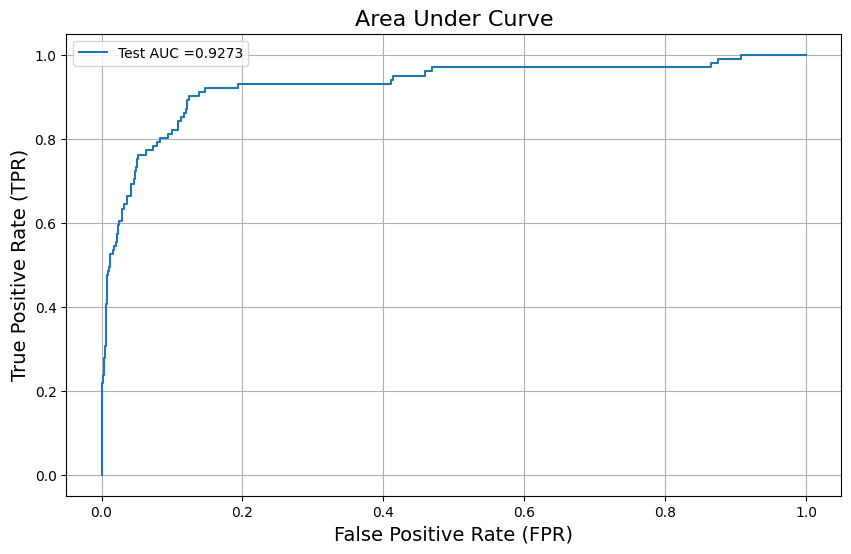

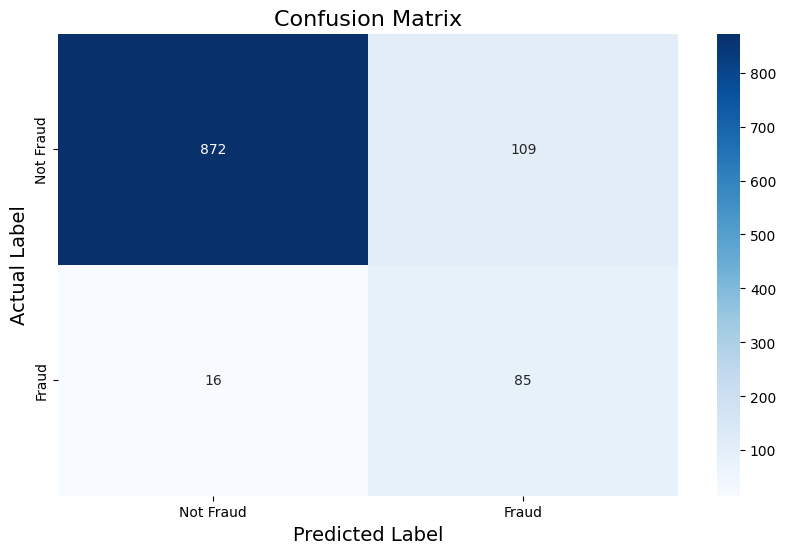

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       981
           1       0.44      0.84      0.58       101

    accuracy                           0.88      1082
   macro avg       0.71      0.87      0.75      1082
weighted avg       0.93      0.88      0.90      1082

Best Threshold = 0.2092
Model AUC is : 0.9273
Model F1 Score is : 0.5763


In [63]:
# call final_fun_2 for prediction
x_test_provider, test_auc, test_f1_score = final_fun_2(X)

In [59]:
# print actual label along with predicted label
x_test_provider.head()

,Provider,PotentialFraud,predicted_label
0,PRV51005,1,1
1,PRV51008,0,0
2,PRV51011,0,0
3,PRV51012,0,0
4,PRV51016,0,0
